In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [16]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.fillna(data.mean(), inplace=True)
X = data.drop(["id", "stroke"], axis=1)
y = data["stroke"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

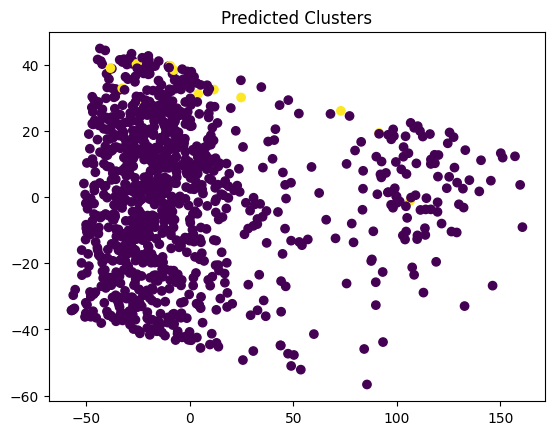

In [18]:

# Reduce dimensionality to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the clusters
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.title("Predicted Clusters")
plt.show()

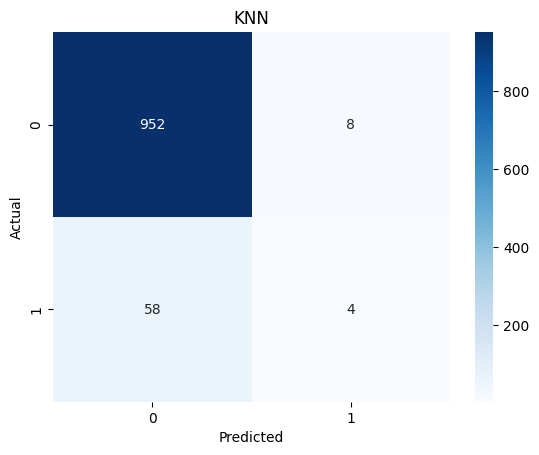

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.33      0.06      0.11        62

    accuracy                           0.94      1022
   macro avg       0.64      0.53      0.54      1022
weighted avg       0.91      0.94      0.91      1022

